# Librairie openCV
OpenCV (pour Open Computer Vision) est une bibliothèque graphique libre, initialement développée par Intel, spécialisée dans le traitement d'images en temps réel.
Il semble obligatoire que son installation se fasse dans un environnement virtuel créé par l'utilisateur et non pas celui de base.

#### prérequis : lancer jupyter notebook depuis l'environnement myenv
* ouvrir une console anaconda
* conda activate myenv
* jupyter-notebook.exe

In [1]:
import sys
print(sys.prefix)

C:\Users\toussaij\anaconda3\envs\myenv


### Lecture d'une image depuis le disque
Utilisation de la fonction __imread__(nom_fichier, option) avec l'option :
* cv2.IMREAD_UNCHANGED pour lire des images avec un canal alpha (transparence)
* cv2.IMREAD_COLOR pour convertir l'image en 3 canaux de couleurs BGR.
* cv2.IMREAD_GRAYSCALE pour convertir l'image en 1 canal de gris

In [2]:
# conda install -c conda-forge opencv
# https://www.delftstack.com/fr/howto/python/conda-install-cv2/
# https://www.geeksforgeeks.org/reading-image-opencv-using-python/
    
# importation du module openCV
import cv2
 
# lecture d'une image, img est un numpy ndarray
img = cv2.imread("lena.png", cv2.IMREAD_COLOR)
 
# affichage dans une fenetre graphique, 1er param : nom de la fenetre, 2e param : image array
cv2.imshow("lena", img)
 
# attente en ms sinon appui d'une touche dans la fenetre graphique
cv2.waitKey(0)
 
# OBLIGATOIRE appel des destructeurs et desallocation memoire
cv2.destroyAllWindows()

### Exercice :
Convertir l'image lors de la lecture en niveaux de gris, __lors de la lecture__

### Après lecture

In [3]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# affichage dans une fenetre graphique, 1er param : nom de la fenetre, 2e param : image array
cv2.imshow("lena_gray", img_gray)

# attente en ms sinon appui d'une touche dans la fenetre graphique
cv2.waitKey(0)
 
# OBLIGATOIRE appel des destructeurs et desallocation memoire
cv2.destroyAllWindows()

### Sauvegarde de l'image
Le format de l'image sauvegardée est donné par l'extension du fichier

In [4]:
cv2.imwrite('./image.jpg',img)

True

### taille de l'image
L'image est stockée en mémoire sous la forme d'un tableau numpy

In [ ]:
print(type(img))

# dimensions de l'image
dimensions = img.shape
 
# hauteur, largeur et nombre de channels = bands
height = img.shape[0]
width = img.shape[1]
channels = img.shape[2]
 
print('Image Dimension    : ',dimensions)
print('Image Height       : ',height)
print('Image Width        : ',width)
print('Number of Channels : ',channels)

In [5]:
factor = 0.6 # facteur d'échelle par rapport à l'image originelle
width  = int(img.shape[1] * factor)
height = int(img.shape[0] * factor)
dim = (width, height)
  
# image redim
img_redim = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
 
print('Nouvelles dimensions : ', img_redim.shape)

# affichage dans une fenetre graphique, 1er param : nom de la fenetre, 2e param : image array
cv2.imshow("image ", img_redim)
cv2.waitKey(0)
cv2.destroyAllWindows()

Nouvelles dimensions :  (307, 307, 3)


### exercice : 
changer le rapport d'aspect

In [6]:
#flip vertical, horizontal et les deux
flip_v, flip_h, flip_hv = (0, 1, -1)

img_flip = cv2.flip(img, flip_h)
cv2.imshow("flip ", img_flip)

# attente en ms sinon appui d'une touche dans la fenetre graphique
cv2.waitKey(0)
 
# appel des destructeurs et desallocation memoire
cv2.destroyAllWindows()


### Transformation affine

In [7]:
from math import *
import numpy as np

# taille de l'image en pixels.
(rows, cols) = img.shape[:2]
print((rows, cols)) 

# Matrice de transformation affine : rotation + translation
A45=np.ndarray(shape=(2, 3), dtype='float')
theta=pi/4.;
A45[0] = [ cos(theta), sin(theta), 0]
A45[1] = [-sin(theta), cos(theta), 0]

img_rot45 = cv2.warpAffine(img, A45, (cols, rows))

cv2.imshow("Manuel rot45 ", img_rot45)

# attente en ms sinon appui d'une touche dans la fenetre graphique
cv2.waitKey(0)

# getRotationMatrix2D cree une matrice de rotation 
# parametres sont les coords du centre tuple, l'angle en degres, l'échelle 
A45 = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 1)

print('Matrice de rotation : \n', A45)
img_rot45 = cv2.warpAffine(img, A45, (cols, rows))

cv2.imshow("rot45 ", img_rot45)

# attente en ms sinon appui d'une touche dans la fenetre graphique
cv2.waitKey(0)
 
# appel des destructeurs et desallocation memoire
cv2.destroyAllWindows()


(512, 512)
Matrice de rotation : 
 [[   0.70710678    0.70710678 -106.03867197]
 [  -0.70710678    0.70710678  256.        ]]


### Translation

In [8]:
from math import *

# taille de l'image en pixels.
(rows, cols) = img.shape[:2]
print((rows, cols)) 

# Matrice de transformation affine : rotation + translation
T=np.array([[1, 0, cols/2], 
            [0, 1, 0     ]], dtype='float')

img_tr = cv2.warpAffine(img, T, (cols, rows))

cv2.imshow("Translation ", img_tr)

# attente en ms sinon appui d'une touche dans la fenetre graphique
cv2.waitKey(0)
 
# appel des destructeurs et desallocation memoire
cv2.destroyAllWindows()

(512, 512)


## Opérations arithmétiques sur des images avec OpenCV
Les opérations arithmétiques comme l'addition, la soustraction et les opérations par bit (AND, OR, NOT, XOR) peuvent être appliquées aux images d'entrée. 

In [9]:
import cv2
import numpy as np
    
# cv2.addWeighted is applied over the
# image inputs with applied parameters
weightedSum = cv2.addWeighted(img, 0.6, img_flip, 0.4, 0)
 
# affichage dans une fenetre graphique, 1er param : nom de la fenetre, 2e param : image array
cv2.imshow('Weighted Image', weightedSum)
 
# attente en ms sinon appui d'une touche dans la fenetre graphique
cv2.waitKey(0)
 
# appel des destructeurs et desallocation memoire
cv2.destroyAllWindows()
    

In [10]:
vis = np.concatenate((img, img_flip), axis=1)

# affichage dans une fenetre graphique, 1er param : nom de la fenetre, 2e param : image array
cv2.imshow('Weighted Image', vis)
 
# attente en ms sinon appui d'une touche dans la fenetre graphique
cv2.waitKey(0)
 
# appel des destructeurs et desallocation memoire
cv2.destroyAllWindows()

In [11]:
sub = cv2.subtract(img_flip, img)

# affichage dans une fenetre graphique, 1er param : nom de la fenetre, 2e param : image array
cv2.imshow('Weighted Image', sub)
 
# attente en ms sinon appui d'une touche dans la fenetre graphique
cv2.waitKey(0)
 
# appel des destructeurs et desallocation memoire
cv2.destroyAllWindows()

In [12]:
# bitwise AND de 2 images
import cv2
import numpy as np
    
#lecture des images
img1 = cv2.imread('image1.png') 
img2 = cv2.imread('image2.png')
 
# cv2.bitwise_and pour appliquer un ET logique sur chaque paire de pixels : blanc = 255, noir = 0
dest_and = cv2.bitwise_and(img2, img1, mask = None)
 
vis = np.concatenate((img1, img2, dest_and), axis=0)

# affichage dans une fenetre graphique, 1er param : nom de la fenetre, 2e param : image array
cv2.imshow('Bitwise And', vis)

# attente en ms sinon appui d'une touche dans la fenetre graphique
cv2.waitKey(0)
 
# appel des destructeurs et desallocation memoire
cv2.destroyAllWindows()

### Exercice :
faire de même avec les opérateurs bit à bit __OR__ et __XOR__

#Détection des
Le détecteur d'arêtes de Canny est un opérateur de détection d'arêtes qui utilise un algorithme à plusieurs étapes pour détecter un large éventail d'arêtes dans les images. Il a été développé par John F. Canny en 1986. Canny a également produit une théorie computationnelle de la détection des contours expliquant pourquoi la technique fonctionne. 

In [13]:
# Canny edge detection.
edges = cv2.Canny(img, 100, 200)

# affichage dans une fenetre graphique, 1er param : nom de la fenetre, 2e param : image array
cv2.imshow('edge', edges)

# attente en ms sinon appui d'une touche dans la fenetre graphique
cv2.waitKey(0)
 
# appel des destructeurs et desallocation memoire
cv2.destroyAllWindows()

# equalization = homogénéisation de la distribution de la luminescence
Il s'agit d'une méthode qui améliore le contraste d'une image, afin d'étendre la gamme d'intensité.


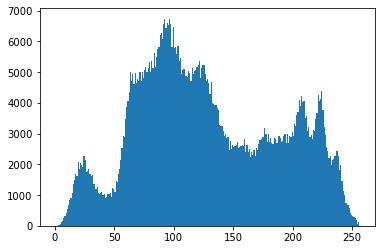

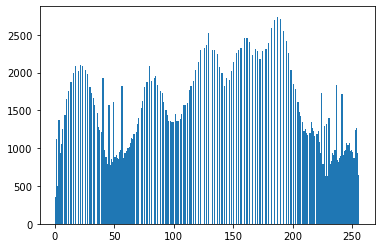

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#hist = cv.calcHist([img],[0],None,[256],[0,256])

hist,bins = np.histogram(img.ravel(),256, (0,256))
plt.hist(img.ravel(),256,(0,256)); plt.show()

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_equa = cv2.equalizeHist(img_gray)

# affichage dans une fenetre graphique, 1er param : nom de la fenetre, 2e param : image array
cv2.imshow('equalization', img_equa)

# attente en ms sinon appui d'une touche dans la fenetre graphique
cv2.waitKey(0)
 
# appel des destructeurs et desallocation memoire
cv2.destroyAllWindows()

plt.hist(img_equa.ravel(),256,(0,256)); plt.show()

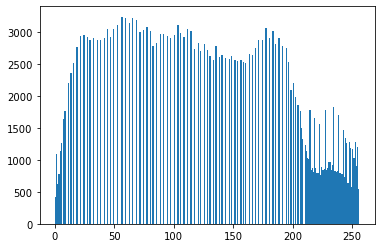

In [15]:
img_equa = np.ndarray(shape=img.shape, dtype=img.dtype)
img_equa[..., 0] = cv2.equalizeHist(img[..., 0])
img_equa[..., 1] = cv2.equalizeHist(img[..., 1])
img_equa[..., 2] = cv2.equalizeHist(img[..., 2])

# affichage dans une fenetre graphique, 1er param : nom de la fenetre, 2e param : image array
cv2.imshow('equalization', img_equa)

# attente en ms sinon appui d'une touche dans la fenetre graphique
cv2.waitKey(0)
 
# appel des destructeurs et desallocation memoire
cv2.destroyAllWindows()

plt.hist(img_equa[..., 0].ravel(),256,(0,256)); plt.show()